In [7]:
from langgraph.graph import START, END, StateGraph
from langgraph.graph.message import add_messages, BaseMessage
from langgraph.checkpoint.memory import InMemorySaver

from langchain_ollama import ChatOllama

from typing import TypedDict, List, Optional, Annotated

In [13]:
class AgentState(TypedDict):

    topic: str
    joke: Optional[str]
    explaination: Optional[str]

In [3]:
llm = ChatOllama(model = 'qwen3:8b')

In [4]:
def generate_joke(state: AgentState):

    prompt = f"Generate a joke on the topic: {state['topic']}"

    output = llm.invoke(prompt)

    return {
        'joke': output.content
    }

In [5]:
def generate_explaination(state: AgentState):

    prompt = f"Generate an explaination for the joke: {state['joke']}"

    output = llm.invoke(prompt)

    return  {
        "explaination": output.content
    }

In [10]:
checkpointer = InMemorySaver()

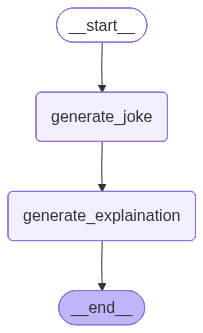

In [11]:
graph = StateGraph(AgentState)
graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explaination', generate_explaination)

graph.add_edge('generate_joke', 'generate_explaination')
graph.add_edge('generate_explaination', END)

graph.set_entry_point('generate_joke')

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [12]:
# defining thread id
config = {
    'configurable': {'thread_id': '1'}
}

In [14]:
initial_state: AgentState = {
    'topic': "pizza"
}

In [15]:
output = workflow.invoke(input = initial_state, config=config)

In [16]:
output

{'topic': 'pizza',
 'joke': "Why don't skeletons eat pizza?  \nBecause they don’t have the **guts**! 🍕💀  \n\n*(Bonus: They also can’t slice it—literally!)* 😄",
 'explaination': 'The joke plays on a clever double meaning of the word **"guts"** and a literal interpretation of a skeleton\'s anatomy. Here\'s the breakdown:\n\n1. **Pun on "guts"**:  \n   Skeletons, by definition, don’t have internal organs like a stomach or intestines—so they literally *lack the guts* to eat pizza. The word "guts" here refers to the physical organs needed for digestion, not the metaphorical courage to do something. The humor comes from the absurdity of a skeleton being unable to eat pizza because they’re missing the very body parts required to process it.\n\n2. **Bonus twist on slicing**:  \n   The added punchline ("They also can’t slice it—literally!") humorously extends the joke by imagining a skeleton’s inability to use tools (like a pizza cutter) or their bones being too rigid to cut through pizza. It’s

In [23]:
from pprint import pprint

pprint(workflow.get_state(config))

StateSnapshot(values={'topic': 'pizza', 'joke': "Why don't skeletons eat pizza?  \nBecause they don’t have the **guts**! 🍕💀  \n\n*(Bonus: They also can’t slice it—literally!)* 😄", 'explaination': 'The joke plays on a clever double meaning of the word **"guts"** and a literal interpretation of a skeleton\'s anatomy. Here\'s the breakdown:\n\n1. **Pun on "guts"**:  \n   Skeletons, by definition, don’t have internal organs like a stomach or intestines—so they literally *lack the guts* to eat pizza. The word "guts" here refers to the physical organs needed for digestion, not the metaphorical courage to do something. The humor comes from the absurdity of a skeleton being unable to eat pizza because they’re missing the very body parts required to process it.\n\n2. **Bonus twist on slicing**:  \n   The added punchline ("They also can’t slice it—literally!") humorously extends the joke by imagining a skeleton’s inability to use tools (like a pizza cutter) or their bones being too rigid to cut 

In [25]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why don't skeletons eat pizza?  \nBecause they don’t have the **guts**! 🍕💀  \n\n*(Bonus: They also can’t slice it—literally!)* 😄", 'explaination': 'The joke plays on a clever double meaning of the word **"guts"** and a literal interpretation of a skeleton\'s anatomy. Here\'s the breakdown:\n\n1. **Pun on "guts"**:  \n   Skeletons, by definition, don’t have internal organs like a stomach or intestines—so they literally *lack the guts* to eat pizza. The word "guts" here refers to the physical organs needed for digestion, not the metaphorical courage to do something. The humor comes from the absurdity of a skeleton being unable to eat pizza because they’re missing the very body parts required to process it.\n\n2. **Bonus twist on slicing**:  \n   The added punchline ("They also can’t slice it—literally!") humorously extends the joke by imagining a skeleton’s inability to use tools (like a pizza cutter) or their bones being too rigid to cut

# Time Travel

In [27]:
workflow.invoke(None, {'configurable': {'thread_id': '1', 'checkpoint_id': '1f0e3073-ca47-6662-8000-7d4077f7182a'}})

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the doctor?  \nBecause it was feeling *a little crusty*! 🍕😄',
 'explaination': 'The joke plays on the double meaning of the word **"crusty."** Here\'s the breakdown:\n\n1. **Literal Meaning**: "Crusty" describes the **crust** of a pizza, the crispy, chewy outer layer.  \n2. **Figurative Meaning**: "Crusty" can also mean **dry, old, or not fresh**—like a stale item that’s lost its appeal.  \n\nThe humor arises from the **unexpected twist**: the pizza, as a food item, is personified as needing a doctor because it’s feeling "crusty" (i.e., stale or unappetizing). The joke cleverly combines the literal pizza crust with the metaphorical state of being unrefreshing, creating a pun that’s both silly and relatable. 🍕😄  \n\n**Why it works**: It’s a playful take on the idea of food "needing help," using wordplay to link the physical crust of a pizza with its condition as a "crusty" (dry) item. The absurdity of a pizza visiting a doctor adds to

In [28]:
list(
    workflow.get_state_history(config)
)

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?  \nBecause it was feeling *a little crusty*! 🍕😄', 'explaination': 'The joke plays on the double meaning of the word **"crusty."** Here\'s the breakdown:\n\n1. **Literal Meaning**: "Crusty" describes the **crust** of a pizza, the crispy, chewy outer layer.  \n2. **Figurative Meaning**: "Crusty" can also mean **dry, old, or not fresh**—like a stale item that’s lost its appeal.  \n\nThe humor arises from the **unexpected twist**: the pizza, as a food item, is personified as needing a doctor because it’s feeling "crusty" (i.e., stale or unappetizing). The joke cleverly combines the literal pizza crust with the metaphorical state of being unrefreshing, creating a pun that’s both silly and relatable. 🍕😄  \n\n**Why it works**: It’s a playful take on the idea of food "needing help," using wordplay to link the physical crust of a pizza with its condition as a "crusty" (dry) item. The absurdity of a pizza visit

# We can also change the value of state variables at particular nodes in time travel

In [31]:
workflow.update_state(
    {'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e3073-ca47-6662-8000-7d4077f7182a'}},
    {"topic": "samosa"}
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0e3487-24d6-6c8d-8001-b301f3661596'}}

In [32]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e3487-24d6-6c8d-8001-b301f3661596'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-12-27T17:21:14.331241+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e3073-ca47-6662-8000-7d4077f7182a'}}, tasks=(PregelTask(id='92e9afde-cf93-e92f-9a5e-81de0496d402', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e3485-804a-6101-8001-1d5d6769392f'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-12-27T17:20:30.233408+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id

In [33]:
workflow.invoke(None, config = {
    'configurable': {'thread_id': '1', 'checkpoint_id': '1f0e3487-24d6-6c8d-8001-b301f3661596'}
})

{'topic': 'samosa',
 'joke': '**Joke:**  \n"Why did the samosa cross the road? To get to the other side… and the filling!"  \n\n**Punchline:**  \n*(A play on the classic "Why did the chicken cross the road?" joke, with a cheeky nod to samosa\'s spicy, flavorful fillings!)* 🥟🔥',
 'explaination': 'The joke plays on the classic "Why did the chicken cross the road?" trope, substituting the chicken with a samosa. The humor lies in the unexpected twist: instead of a straightforward answer ("to get to the other side"), the punchline cheekily ties the samosa\'s reason for crossing to its **filling**.  \n\nHere’s the breakdown:  \n- **Classic setup**: The joke mirrors the chicken’s famous question, but replaces the chicken with a samosa.  \n- **Punchline twist**: The samosa’s reason for crossing is not just to reach the "other side" (as in the original joke) but specifically to access its **filling**—a nod to the samosa’s spicy, flavorful interior.  \n- **Wordplay**: The humor hinges on the abs